<a href="https://colab.research.google.com/github/LondonP90141/CSC-2400-004-term-project/blob/main/2400_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Knapsack 0/1: Determining Maximum Efficiency Using Brute-Force, Dynamic Programing, and Greedy Algorithms
---
----

Term project, CSC 2400 004

Beshoy Farag, London Pinkney, Rachel Robertson

Github: https://github.com/LondonP90141/CSC-2400-004-term-project


**How to Run the Code**

The code can be run by downloading it directlly from Github and using the following command.

```
python main.py
```



**Objective**

To determine which of the following is most optimally efficient for solving the knapsack 0/1 problem: Brute force, greedy or dynamic programing.

**Problem Overview**
---
----




**What is the Knapsack Problem?**


*   The **Knapsack problem** is a cost-benefit analysis problem that takes the weight, and value, of individual items along with the maximum capacity of a container (knapsack) and returns a list of items that produce the highest value while staying within the weight limit.

*    **Knapsack 0/1** is a variation of the knapsack problem that requires only whole items to be selected rather than fractional items.



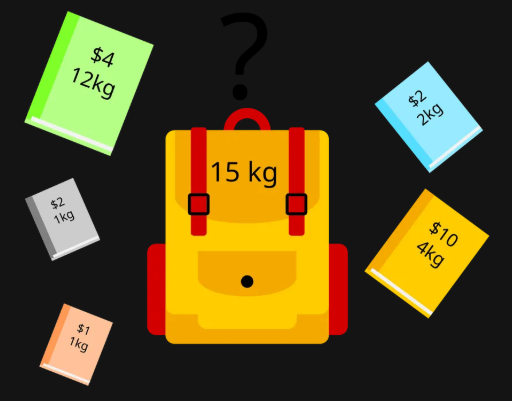

Image from Wikipedia:
https://en.wikipedia.org/wiki/Knapsack_problem

**Solution Types and Testing**

*	The efficiency analysis will compare versions of **brute force**, **dynamic programming**, and **greedy** approaches.

*	To test the efficiency of each solution the algorithms will be run in batches of 100 on 5 differently sized datasets. The average time for each batch is then calculated and used for comparison.


**Research Questions and Predictions**
---
----







**Question 1**

As the dataset used increases in size which algorithms will become more efficient (i.e., how much time is the algorithm spending on average per dataset member) and Which algorithms will become less efficient?


*   **Prediction:** The efficiency of dynamic programing will increase as the dataset gets larger, the efficiency of brute force will decrease, and the efficiency of greedy will not be significantly impacted.

**Question 2**

Which algorithm will be fastest for each dataset size?

*   **Prediction:** Greedy will likely be the fastest for tiny, small, and medium datasets but dynamic programing will be faster for Large and huge datasets due to the overhead of constructing a lookup table.


**Question 3**

Which algorithm will be the fastest overall?

*   **Prediction:** it seems likely that the greedy algorithm will be the fastest overall because it does not find the optimal solution, rather it prioritizes speed.

Algorithms
---
----

**Brute Force**

*   The brute force solution simply **checks every possible combination** of objects that can fit into the knapsack and returns the solution with the highest value.



*   The brute force algorithm used for this project was generated by AI and  uses nested for loops to evaluate all unique combinations of the items.


*   One advantage of this algorithm is that it will always return the best possible answer, however it is not very efficient for larger datasets because it has to make exponentially more comparisons as the number of items increases.

*   The time complexity for this algorithm is O(2ⁿ)

In [1]:
"""
ALGORITHM knapsack_bruteforce(values, weights, capacity)
Input:        Accepts 3 parameters, an array of values, an array of weights
              and an integer for the capacity.
Output:       Returns the highest possible value of the items
              while staying within the capacity and a list of the items
              that sum to the best value within the capacity.
Source:       Generated using AI
"""

from itertools import combinations

def knapsack_bruteforce(values, weights, capacity):

    # Tries every subset. Only good for small inputs.
    n = len(values)
    best_value = 0
    best_items = []

    for r in range(n + 1):
        for combo in combinations(range(n), r):
            total_w = sum(weights[i] for i in combo)
            total_v = sum(values[i] for i in combo)

            if total_w <= capacity and total_v > best_value:
                best_value = total_v
                best_items = list(combo)
    print(f"Best Value: {best_value}")
    return best_value, best_items

"""
Values for demonstration purposes
"""
if __name__ == "__main__":
    val = [1, 2, 3]
    wt = [4, 5, 1]
    W = 4

    print(knapsack_bruteforce(val, wt, W))

Best Value: 3
(3, [2])


**Greedy**

*   The greedy solution to this problem takes the highest value item that fits in the knapsack until the capacity is too small to fit another item.

*   This algorithm is faster than the brute force solution because it only has to check a small portion of all possible answers. However, this algorithm will not necessarily return the most valuable solution. This makes the algorithm good for estimation but not for a precise answer.

*   The algorithm used was taken from Geeks for Geeks
    
    https://www.geeksforgeeks.org/dsa/difference-between-greedy-knapsack-and-0-1-knapsack-algorithms/

*   The time complexity is O(n log n)

*   The precise code used can be found in the github repository (linked at the top).





**Dynamic Programing**

*   Dynamic programing uses recursion to go through only the necessary permutations to find the optimal solution.

*   This method is more efficient than the brute-force methods for larger data sets, however, it requires additional memory resources to create a lookup table. The lookup table saves time by reusing values that have already been computed and therefore skipping duplicate computations.

*   The time complexity is O(n·W)

In [2]:
"""
ALGORITHM knapsack_dp(values, weights, capacity)
Input:        Accepts 3 parameters, an array of values, an array of weights
              and an integer for the capacity.
Output:       Returns the highest possible value of the items
              while staying within the capacity and a list of the items
              that sum to the best value within the capacity.
Source:       Generated using AI
"""

# Bottom-up DP. Fast and exact.
def knapsack_dp(values, weights, capacity):
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        w_i = weights[i - 1]
        v_i = values[i - 1]

        for w in range(capacity + 1):
            if w_i <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - w_i] + v_i)
            else:
                dp[i][w] = dp[i - 1][w]

    # Reconstruct chosen items
    chosen = []
    w = capacity
    i = n

    while i > 0:
        if dp[i][w] != dp[i - 1][w]:   # item was taken
            chosen.append(i - 1)
            w -= weights[i - 1]
        i -= 1

    chosen.reverse()
    return dp[n][capacity], chosen

"""
Values for demonstration purposes
"""
if __name__ == "__main__":
    val = [1, 2, 3]
    wt = [4, 5, 1]
    W = 4

    print(knapsack_dp(val, wt, W))

(3, [2])


Experimentation Procedure
---
----


**Procedure**
1.    The data set used for this project was generated by AI and had 2048 items in it. The program then slices the data into 4 smaller datasets from that one. The datasets are as follows; **Tiny** with 102 items, **Small** with 204 items, **Medium** with 512 items, **Large** with 1024 items and **Huge** with 2048 items. The **datasets are not unique from one another** because they are all **just a portion of the original dataset**.

2.   The data sets are read in by a python script and converted into libraries.

3.   The first algorithm is applied to the first dataset 100 times. The program returns the average value for the batch. The user manually selects each dataset size and algorithm for each batch until all datasets and algorithms are run.

Data and Specs
---
----

**TEST 1**


---



**Table 1A**

Speed (Average of 100 runs) |Brute Force   |Greedy      | Dynamic Programing|
----------------------------|--------------|------------|-------------------|
**Huge** (2048 items)       |      DNF     |   0.0014   |       8.6708      |
**Large** (1024 items)      |      DNF     |   0.0623   |       2.1571      |
**Medium** (512 items)      |      DNF     |   0.000022 |       0.3932      |
**Small** (204 items)       |   3.09       |   0.000015 |       0.1712      |
**Tiny** (102 items)        |   0.0021     |   0.000009 |       0.1602      |

**Table 1B**
 Speed Per Item (Efficiency)|Brute Force   |Greedy      | Dynamic Programing|
----------------------------|--------------|------------|-------------------|
**Huge** (2048 items)       |      NA      | 6.8359e-7  |       0.0042      |
**Large** (1024 items)      |      NA      | 6.0840e-5  |       0.0021      |
**Medium** (512 items)      |      NA      | 4.2969e-8  |    7.6797e-4      |
**Small** (204 items)       |   .015       | 7.3529e-8  |    8.3922e-4      |
**Tiny** (102 items)        |   .00002     | 8.8235e-8  |       0.0016      |

**Table 1C**

Specs for test 1        |   |
------------------------|--------------|
Operating System        | Not recorded |
Processor               | Not recorded |
RAM                     | Not recorded |
System type             | Not recorded |


**Table 1D**
Operating System ||
-----------------|-------------------------------------------------------
Edition          |	Not recorded
Version	         |  Not recorded
OS build	       |  Not recorded

**TEST 2**

---



**Table 2A**
Speed (Average of 100 runs)|Brute Force   |Greedy      | Dynamic Programing|
---------------------------|--------------|------------|-------------------|
**Huge** (2048 items)      |      DNF     |   4.2e-4   |       1.8418      |
**Large** (1024 items)     |      DNF     |   1.45e-4  |       0.9091      |
**Medium** (512 items)     |      DNF     |   6.3e-5   |       0.3837      |
**Small** (204 items)      |      DNF     |   2.2e-5   |       0.1401      |
**Tiny** (102 items)       |      DNF     |   3.5e-5   |       0.0670      |

**Table 2B**
Speed Per Item (Efficiency)|Brute Force   |Greedy      | Dynamic Programing|
---------------------------|--------------|------------|-------------------|
**Huge** (2048 items)      |      DNF     |  2.0508e-7 |       8.9932e-4   |
**Large** (1024 items)     |      DNF     |  1.4160e-7 |       8.8779e-4   |
**Medium** (512 items)     |      DNF     |  1.2305e-7 |       7.4941e-4   |
**Small** (204 items)      |      DNF     |  1.0784e-7 |       6.8676e-4   |
**Tiny** (102 items)       |      DNF     |  3.4314e-7 |       6.5686e-4   |

**Table 2C**

Specs for test 2        |   |
------------------------|-----------------------------------------------|
Processor               | 13th Gen Intel(R) Core(TM) i7-1355U (1.70 GHz)|
RAM                     | 16.0 GB |
System type             | 64-bit operating system, x64-based processor |

**Table 2D**
Operating System ||
-----------------|-------------------------------------------------------
Edition          |	Windows 11 Home
Version	         |  24H2
OS build	       |  26100.7171



**Important Notes:**


1.  The brute force algorithm **was so inefficient** that it did not run even once (let alone in a batch of 100) on the smallest dataset in **less than an hour**. Therefore, the time is **marked as DNF** (Did Not Finish).

    The algorithm was tested to ensure that **it is functioning as expected**, it is simply too slow to be run in a reasonable amount of time on the provided hardware.


2.  2 tests were performed and the data is listed above. Due to **concerns with unexpected errors** during the running of the first test we decided to run a second test on a different machine.

    The second test ran without issue and there are no obvious anomalies with the data therefore:

 **The data from the second test will be used for all comparisons and charts going forward and *the first test data will be effectively thrown out*.**

**Graphical Representation**
---
----

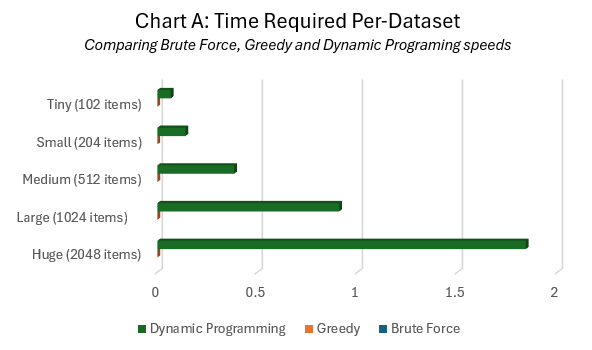

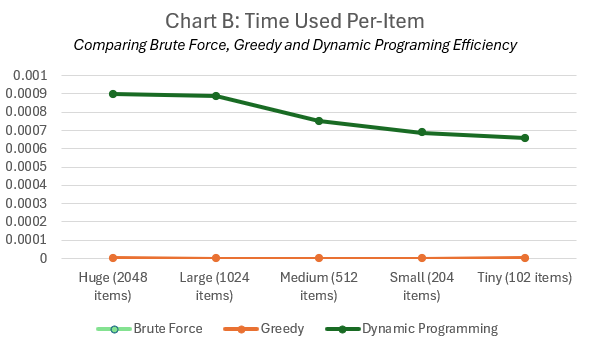

**Notice:**

The brute force method does not have a precise value associated with it due to the amount of time the algorithm took to run.

The brute force algorithm should be understood as **arbitrarily large**.

Conclusions
---
----



**Analysis**


*   The thing that is immediately  obvious is that the **efficiency of the algorithms is decreasing** as the dataset gets larger for the Tiny through Large datasets.

*   The efficiency of dynamic programing **shows signs of plateauing** from the Large to Huge datasets.

*   The efficiency of the greedy algorithm is **largely stable** across the datasets.

*   The efficiency of the brute force algorithm can be **understood as arbitrarily large** and therefore not a serious competitor for the most efficient solution.

**Research Question Answers**


**Question 1**

As the dataset used increases in size which algorithms will become more efficent (ie how much time is the algorithm spending on average per dataset member) and Which algorithms will become less efficient?


**Answer:**
1. **None** of the algorithms experienced **increased efficiency** as the
datasets increased in size. This was contrary to the prediction made that the efficiency of dynamic programing will increase, rather it showed signs of stabilizing, **increasing in a sort of stepped manner** rather than a linear increase.

2. No conclusive statements can be made about the efficiency of the brute force algorithm based on this data alone.

3. As anticipated, the **greedy method** remained essentially **equally efficient** regardless of the dataset it operated on.


**Question 2**

Which algorithm will be fastest for each dataset size?
*   **Answer:** The fastest algorithm in each dataset is clearly the **greedy algorithm**. Upon consideration this makes sense because the algorithm would only become appreciably slower if the capacity of the knapsack increased dramatically. That aside, it is also intuitive to notice that the greedy method **can only approximate** the solution and is therefore unburdened by the rigors of precision

**Question 3**

Which algorithm is the fastest overall?
*   **Answer:** The **greedy algorithm** is the fastest overall and is rationalized by the same reasoning as stated in the answer to question 2.



Answer to the Objective
---
----

The objective of this project was:

"To determine which of the following is most optimally efficient for solving the knapsack 0/1 problem; Brute force, greedy or dynamic programing."

The fastest algorithm of the ones tested was the greedy algorithm, but **it would not be right to say that it solves the problem**. The greedy algorithm can **only approximate** the solution.

Therefore, the most efficient algorithm of the 3 that solves the problem is **Dynamic Programing**.

Challenges and Next Steps
---
----

**Limitations of the Experiment**

*   **Scope and Efficiency:** Some of the algorithms used struggled to run on the larger datasets due to various factors including hardware limitations and algorithmic efficiency.

*   **Hardware Variation:** Only one type of computer was used for the analysis, therefore the results may not be conclusive for other machines.

*   **Larger Sample size:** Despite running batches of 100 per algorithm and utilizing 5 dataset sizes, the results would likely be better if the algorithms were run in both larger batches.

*   **Variation in Dataset Size:** It limited the usefulness of the experiment for the different sizes of datasets to be limited. Adding smaller datsets would provide insight into the slower algorithms like brute force. Adding larger datasets would help flesh out the pattern of decreasing efficiency for more efficient algorithms like dynamic programing.

**Potential Improvements and Mistakes**

*   **Testing Errors:** One notable mistake was that our first test had to be thrown out due to concerns during testing that occurred for **unknown reasons**. This incident would need to be investigated more deeply for an improvement to be proposed as anything added at this time would be unfounded speculation.

*   **Hardware Improvements:** The efficiency of this project would be greatly improved by using faster processors.

*   **Parallel Programing:** The efficiency of the code and size of the batches could be improved by running the algorithms in parallel using pragma and other parallel tools.



**Challenges**

*   **Debugging:** Chasing down bugs can be time consuming and frustrating. In one instance the relative and absolute imports were mixed up in the program. This error sapped up a decent amount of time. Thankfully, London addressed this bug, and the program is now running smoothly.


*   **Organization:** This project was a bit difficult to organize, however after a few meetings the team was able to get things on track and continue to communicate well during the rest of the project.

*   **Experience:** Some of the tools that were used for this project such as Github, Google Collab, and Python were a bit difficult to get the hang of due to a lack of experience on the part of the team. These challenges were ultimately overcomable, and the team is now better equipped to tackle similar problems in the future.




**Next Steps**

*   **Increase Variation of Algorithms:** The most obvious improvement would be to include more algorithms (and adjust the objective to reflect that change) that solve the knapsack 0/1 problem. Adding more algorithms is by far the best way to expand this project.

*   **Increase Scale:** Use multiple machines with better hardware along with a greater variety of datasets and larger batches to make differences between algorithms more pronounced.



Work Allocation Table
---
----



**Contributions by Percentage**

Feilds                    |Beshoy Farag  |London Pinkney|Rachel Robertson|
--------------------------|--------------|----------|-------------------|
**Brainstorming**         |      20%     |   40%    |        40%        |
**Coding/Datasets**       |      5%      |   95%    |        ---        |
**Github**                |      ---     |   100%   |        ---        |
**Experiment Design**     |      30%     |   30%    |        40%        |
**Visualization/Results** |      10%     |   10%    |        80%        |
**Communication**         |      20%     |   40%    |        40%        |
**Submission**            |      ---     |   ---    |        ✅        |
**Report Writing**        |      ---     |   ---    |        100%       |
**Presentation Slides**   |      ---     |   ---    |        100%       |
**Data Collection**       |      40%     |   ---    |        60%        |